In [20]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
# Create a Ticker object for the S&P 500 index
sp500 = yf.Ticker("^GSPC")

# Fetch the complete available history for the S&P 500
sp500 = sp500.history(period="max")

sp500.to_csv("sp500.csv")

In [22]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-24 00:00:00-04:00,5727.660156,5735.319824,5698.990234,5732.930176,3872710000,0.0,0.0
2024-09-25 00:00:00-04:00,5733.649902,5741.029785,5712.060059,5722.259766,3624910000,0.0,0.0
2024-09-26 00:00:00-04:00,5762.220215,5767.370117,5721.009766,5745.370117,4391180000,0.0,0.0


In [23]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24303 entries, 1927-12-30 00:00:00-05:00 to 2024-09-30 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          24303 non-null  float64
 1   High          24303 non-null  float64
 2   Low           24303 non-null  float64
 3   Close         24303 non-null  float64
 4   Volume        24303 non-null  int64  
 5   Dividends     24303 non-null  float64
 6   Stock Splits  24303 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.5 MB


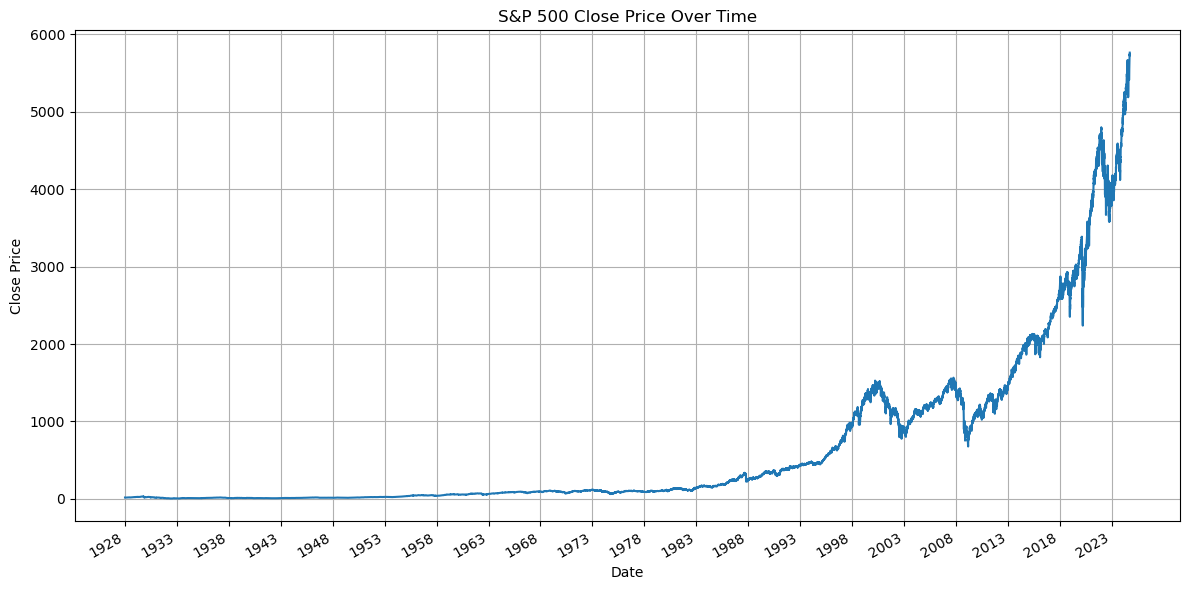

In [24]:
plt.figure(figsize=(12, 6))  
plt.plot(sp500.index, sp500['Close'])
plt.title('S&P 500 Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)


plt.xticks(pd.date_range(start=sp500.index.min(), end=sp500.index.max(), freq='5YS'))  # 5-Year Start frequency
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

plt.tight_layout() 
plt.show()


In [25]:
df = sp500.drop(['Dividends','Stock Splits'], axis=1)

In [26]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


In [27]:
df['Tomorrow'] = df['Close'].shift(-1)  # This shifts the 'Close' column values up by one row

In [28]:
df.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000


In [29]:
df['Target'] = (df['Tomorrow'] > df['Close']).astype(int)

In [30]:
df.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0


In [31]:
df = df[df.index.year >= 1995].copy()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7488 entries, 1995-01-03 00:00:00-05:00 to 2024-09-30 00:00:00-04:00
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      7488 non-null   float64
 1   High      7488 non-null   float64
 2   Low       7488 non-null   float64
 3   Close     7488 non-null   float64
 4   Volume    7488 non-null   int64  
 5   Tomorrow  7487 non-null   float64
 6   Target    7488 non-null   int32  
dtypes: float64(5), int32(1), int64(1)
memory usage: 438.8 KB


In [33]:
df.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1995-01-03 00:00:00-05:00,459.209991,459.269989,457.200012,459.109985,262450000,460.709991,1
1995-01-04 00:00:00-05:00,459.130005,460.720001,457.559998,460.709991,319510000,460.339996,0
1995-01-05 00:00:00-05:00,460.730011,461.299988,459.750000,460.339996,309050000,460.679993,1
1995-01-06 00:00:00-05:00,460.380005,462.489990,459.470001,460.679993,308070000,460.829987,1
1995-01-09 00:00:00-05:00,460.670013,461.769989,459.739990,460.829987,278790000,461.679993,1


In [34]:
df.dropna(inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7487 entries, 1995-01-03 00:00:00-05:00 to 2024-09-27 00:00:00-04:00
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      7487 non-null   float64
 1   High      7487 non-null   float64
 2   Low       7487 non-null   float64
 3   Close     7487 non-null   float64
 4   Volume    7487 non-null   int64  
 5   Tomorrow  7487 non-null   float64
 6   Target    7487 non-null   int32  
dtypes: float64(5), int32(1), int64(1)
memory usage: 438.7 KB


In [36]:
df['Target'].value_counts()

Target
1    4037
0    3450
Name: count, dtype: int64

In [37]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# Feature matrix (X) and target (y)
X = df.drop('Target', axis=1)
y = df["Target"]

# Time series cross-validation setup
time_cv = TimeSeriesSplit(n_splits=5)

# Initialize the RandomForest model
model = RandomForestClassifier(random_state=1)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform grid search with time series split
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='roc_auc', cv=time_cv, n_jobs=-1)

# Fit grid search on the entire dataset (X and y)
grid_search.fit(X, y)

# Display best parameters and best ROC AUC score
print("Best parameters:", grid_search.best_params_)
print("Best ROC AUC score:", grid_search.best_score_)

# Evaluate model using the best parameters found
best_model = grid_search.best_estimator_

# Initialize lists to store metrics
all_y_true = []
all_y_pred = []

accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

# Perform cross-validation using the best model
for train_index, test_index in time_cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the best model
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    
    # Calculate and store metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred_proba))
    
    # Store true labels and predictions
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

# Print average metrics
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Average Precision: {np.mean(precisions):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}")
print(f"Average F1-Score: {np.mean(f1_scores):.4f}")
print(f"Average ROC AUC: {np.mean(roc_auc_scores):.4f}")

# Create and print confusion matrix
cm = confusion_matrix(all_y_true, all_y_pred)
print("Confusion Matrix:")
print(cm)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best ROC AUC score: 0.6802039734118115
Average Accuracy: 0.6148
Average Precision: 0.7959
Average Recall: 0.4116
Average F1-Score: 0.4544
Average ROC AUC: 0.6802
Confusion Matrix:
[[2458  435]
 [1967 1375]]


The model correctly identifies many negative cases (2458) but misses many positive cases (1967 false negatives).
The confusion matrix confirms that the model is heavily biased towards predicting the negative class.